In [1]:
# --- Preamble --- 
import numpy as np
import pandas as pd
import astropy
import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun, get_moon #- for tranformations, takes ref. from simbad.
from astropy.time import Time
import datetime
from datetime import time
from astroplan import Observer
from datetime import timedelta
from pytz import timezone # timezone information 
import matplotlib.pyplot as plt


#--- plot parameters --- 
plt.rcParams["figure.figsize"] = (15,10)
plt.rc('font', family = 'serif', serif = 'cmr10') 
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 30#

# params = {"ytick.color" : "w",
#           "xtick.color" : "w",
#           "axes.edgecolor" : "w"}
# plt.rcParams.update(params)

# --- Colorblind Safe Pallete --- 
colorblind = ['#648fff',
'#785ef0',
'#dc267f',
'#fe6100',
'#ffb000'] 



In [13]:
CALOR_ALTO = Observer(name = 'CAHA (CCD 1.5m)',
                    location = EarthLocation(lat = 37.224972*u.deg, lon = 11.93029*u.deg, height = 2168*u.m),
                    timezone = timezone('Europe/Madrid'),
                    description = "CAO 1.5m optical telescope")

In [27]:
def single_target_plot(observatory, specified_time, timespan, RA, DEC, granulation, target_name):
    '''
    --- 
    INPUT
    ---
    observatory - place parameters for desired observatory dictonary. It should contain location and timezone at the least. 
    specified_time - Desired time of observation. Format: year-month-day hour:min:sec
    timespan - Integer input for the number span of hours wished to be observed
    RA, DEC - RA and DEC values for specified target in degrees.
    granulation - How many points to calculate along target transit path. 
    target_name - String name for plot 
    '''
    # --- Time and Position config --- 

    time = Time(specified_time) + 1*u.hour # - adjusting for a given time zone
    print('Observation time is', time)

    timespan = np.linspace(0, timespan, granulation)*u.hour
    TIMES = time + timespan 
    time_frame = AltAz(obstime = TIMES, location = observatory.location)

    # - Sun and Moon Location during obs. window 
    sun_altazs = get_sun(TIMES).transform_to(time_frame)
    moon_altazs= get_moon(TIMES).transform_to(time_frame)

    # --- Target Transit Path Calculation --- 
    target_pos = SkyCoord(RA, DEC, frame='icrs', unit='deg') 
    target_frame = AltAz(obstime = time + timespan, location = observatory.location)
    target_window = target_pos.transform_to(target_frame)
    target_altazs = target_pos.transform_to(target_window)

    # --- Sun, Moon and Target Plot --- 

    plt.plot(timespan, sun_altazs.alt, color='r', label = 'Sun')
    plt.plot(timespan, moon_altazs.alt, color = [0.3]*3, ls='--', label = 'Moon')
    plt.scatter(timespan, target_altazs.alt, c = target_altazs.az, label = target_name, lw=0, s=8,  cmap='viridis')

    plt.fill_between(timespan, 0*u.deg, 90*u.deg, sun_altazs.alt < -0*u.deg, color =' 0.4', zorder = 0, alpha = 0.25) 
    plt.fill_between(timespan, 0*u.deg, 90*u.deg, sun_altazs.alt < -18*u.deg, color='k', zorder = 0, alpha = 0.2)

    plt.colorbar().set_label('Azimuth [deg]')
    plt.legend(loc='upper left')
    # plt.xticks((np.arange(13)*2-12))
    plt.ylim(0, 90)
    plt.xlabel('Time: %s' % time)
    plt.ylabel('Altitude [deg]')
    plt.grid()
    plt.title(target_name + ' trajectory at CAHA (1.5 m)')
    plt.axhline(y = 30, c = 'k')
    plt.show()

    # --- Sun, Moon and Target Az Plot --- 

    plt.plot(timespan, sun_altazs.az, color='r', label = 'Sun')
    plt.plot(timespan, moon_altazs.az, color = [0.3]*3, ls='--', label = 'Moon')
    plt.scatter(timespan, target_altazs.az, c = target_altazs.alt, label = target_name, lw=0, s=8,  cmap='viridis')

    plt.colorbar().set_label('Altitude [deg]')
    plt.legend(loc='upper left')
    plt.xlabel('Time: %s' % time)
    plt.ylabel('Azimuth [deg]')
    plt.grid()
    plt.axhline(y = 30, c = 'k')
    plt.show()

    # indv_coord = SkyCoord(RA, DEC, frame='icrs', unit='deg')

Observation time is 2022-03-09 19:30:00.000


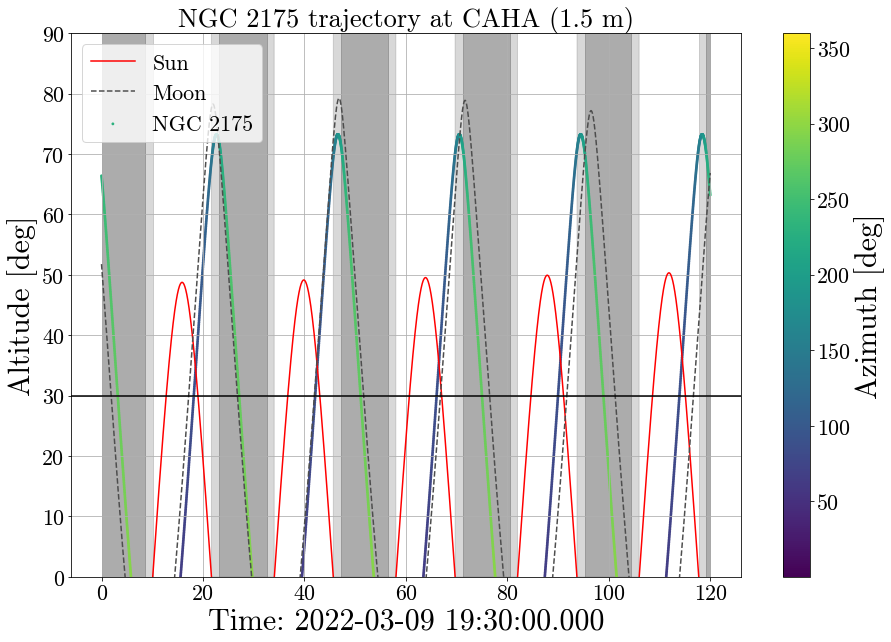

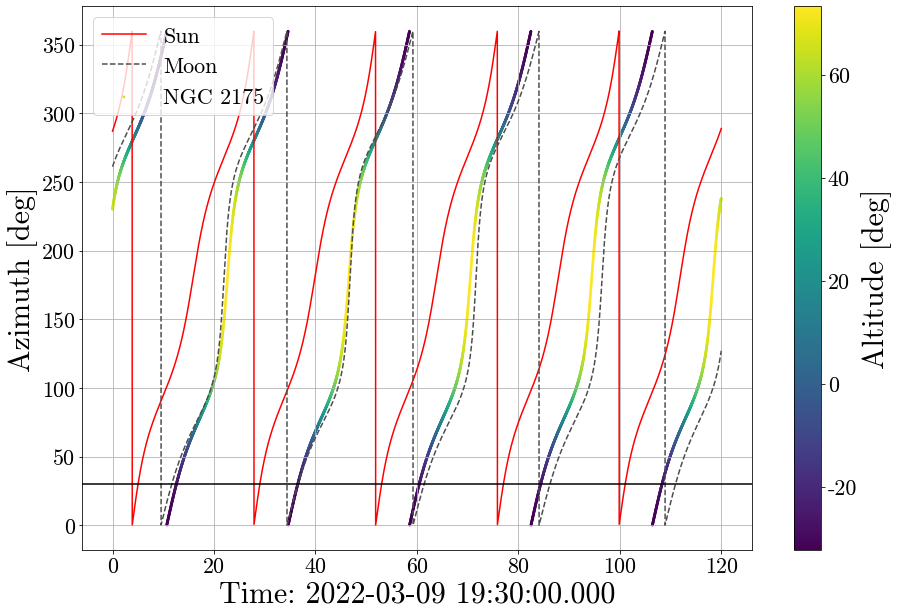

In [29]:
single_target_plot(CALOR_ALTO, '2022-03-09 18:30', 120, 92.4215, 20.4867, 5000, 'NGC 2175')